In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\admin\Downloads\video_id_info.csv',on_bad_lines='skip')

C:\Users\admin\AppData\Local\Temp\ipykernel_2444\3477813987.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\admin\Downloads\video_id_info.csv',on_bad_lines='skip')


In [3]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [5]:
df.isna().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [6]:
df.dropna(inplace =True)

In [7]:
df.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

# Perform Sentiment Analysis

Sentiment analysis is a way for computers to understand and analyze the emotions expressed in text, like whether it's positive, negative, or neutral.
 eg.
* "This video is quite helpful"-->Positive sentiment [0,1] more it will close to 1 it will positve sentiment 
* "Uable to understand the topic" -->Negative sentiment[-1]
* "I'm attending the lecture this afternoon."-->Neutral sentiment[0]

 The polarity range refers to the scale used in sentiment analysis to measure the degree of positivity or negativity in text, typically ranging from -1 to 1

In [8]:
#TextBlob is a Python library for processing textual data. It provides a simple API for common natural language processing (NLP) tasks 
#!pip install textblob
import sys #It's called "sys" because it provides access to system-specific parameters and functions.
!{sys.executable} -m pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [9]:
from textblob import TextBlob

In [10]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [11]:
df.shape

(691374, 4)

In [12]:
#creating a new DataFrame (sample_df) by selecting the first 1000 rows of an existing DataFrame (df).
#This can be useful for working with a smaller subset of data, such as when you want to perform quick analyses or tests without using the entire dataset.

sample_df = df[0:1000]

In [13]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️") # normal text box

TextBlob("Logan Paul it's yo big day ‼️‼️‼️")

In [14]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment #attribute

Sentiment(polarity=0.0, subjectivity=0.1)

In [15]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity
### its a neutral sentence !

0.0

In [16]:
#performing sentiment for each row of comment_text'
#polarity = []--black list

#for comment in df['comment_text']:
    #TextBlob(comment).sentiment.polarity
    #polarity.append(TextBlob(comment).sentiment.polarity)

#if there is black txt then will get the exception error . so avoid the exception we have to use try exception block

#syntax 
#try:
    # Code that might raise an exception
# except :
    # Code to handle the exception


In [17]:
polarity = [] 

for comment in df['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [18]:
len(polarity)

691374

In [19]:
df['polarity'] = polarity

In [20]:
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


# Word Cloud Analysis of your data

Word cloud analysis is a visual representation technique that displays the most frequently occurring words in a text dataset

In [21]:
filter1 = df['polarity']==1
comments_positive=df[filter1]

In [22]:
df[filter1]

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [23]:
filter2 = df['polarity']==-1
comments_negative = df[filter2]

In [24]:
df[filter2]

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
...,...,...,...,...,...
690788,Hlt3rA-oDao,Like Kelly she evil,0,0,-1.0
690865,Ni5Uc-DdMqk,R U FUCKING KIDDING ME?!?!?!?!,11,1,-1.0
691073,4kmSATD25iY,This is horribly offensive please report,0,0,-1.0
691180,xlu6i6lT_vk,Sink holes looks terrifying sinkholes sink you...,0,0,-1.0


In [25]:
#!pip install wordcloud
import sys 
!{sys.executable} -m pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [26]:
from wordcloud import WordCloud,STOPWORDS 

Stopwords are common words like "the," "is," and "and" that are often removed from text during analysis because they don't carry significant meaning.

In [27]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [28]:
 df['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [29]:
type( df['comment_text'])

pandas.core.series.Series

In [30]:
total_comments_positive = ' '.join(comments_positive['comment_text'])

 for wordcloud , we need to frame our 'comment_text' feature into string ..
 joins all the text data from the 'comment_text' column in the DataFrame 'comments_positive' into a single string, separated by spaces.

In [31]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)


The above line of code creates a word cloud from the text data in `total_comments_positive`, using a predefined set of stopwords to filter out common words that don't carry significant meaning.

(-0.5, 399.5, 199.5, -0.5)

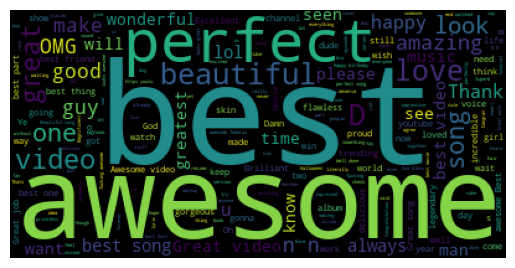

In [32]:
plt.imshow(wordcloud) 
#The imshow() function in matplotlib is used to display images, and in this case, it's used to display the word cloud generated by the WordCloud library. 
plt.axis('off')

### Conclusion-->> positive Users are emphasizing more on best , awesome , perfect , amazing , look , happy  etc..

# Emoji Analysis

In [33]:
#!pip install emoji==2.10.1
import sys 
!{sys.executable} -m pip install emoji==2.10.1 
## 2.10.0 is a most stable version till date , hence installing this version makes sense !

Defaulting to user installation because normal site-packages is not writeable


In [34]:
import emoji

In [35]:
emoji.__version__

'2.10.1'

In [36]:
df['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [37]:
comment = 'trending 😉'

In [38]:
[char for char in comment if char in emoji.EMOJI_DATA]
#The code snippet you provided is a list comprehension that filters out characters from a string (comment) if they are present in the emoji.
#EMOJI_DATA dictionary. It's a way to extract emojis from a text string.

['😉']

In [39]:
all_emojis_list = []

for comment in df['comment_text'].dropna(): ## in case u have missing values , call dropna()
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [40]:
all_emojis_list[0:10]# 1st 10 emojis

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

### Now we have to compute frequencies of each & every emoji in "all_emojis_list"..

In [41]:
from collections import Counter # collection package

In [42]:
Counter(all_emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [43]:
Counter(all_emojis_list).most_common(10)[0]

('😂', 36987)

In [44]:
Counter(all_emojis_list).most_common(10)[0][0]

'😂'

In [45]:
Counter(all_emojis_list).most_common(10)[0][1]

36987

In [46]:
Counter(all_emojis_list).most_common(10)[1][0]

'😍'

In [47]:
Counter(all_emojis_list).most_common(10)[2][0]

'❤'

In [48]:
Counter(all_emojis_list).most_common(10)[0][1]

36987

In [49]:
Counter(all_emojis_list).most_common(10)[1][1]

33453

In [50]:
Counter(all_emojis_list).most_common(10)[2][1]

31119

In [51]:
freqs = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [52]:
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [53]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [54]:
import plotly.io as pio
pio.renderers.default = 'iframe_connected'



In [55]:
import plotly.graph_objs as go
from plotly.offline import iplot  
#use this if your chart is not displaying 
#Plotly is configured to display plots correctly.

In [56]:
trace = go.Bar(x=emojis , y=freqs)

In [57]:
iplot([trace])

## Conclusions : 
Majority of the customers are happy as most of them are using emojis like: funny , love , heart , outstanding..